# Assignment 2: Fraud Detection

Author: Josh NM Blackmore <br>
StID: 201776628

## CASE STUDY

<p>An insurance company plans to utilise their historic insurance fraud dataset to predict the likelihood or the level of risk a customer poses. You can find the dataset above. Referring genuine claims cause customer stress and directly leads to customer loss, costing the company money (assume that any referred non-fraud case will lead to losing that customer). While obviously, fraud claims cost the company as well. Their main requirement is to use an unbiased predictive model capable of flagging and referring potential fraud cases for further investigation with a balanced error rate of 5% (you might or might not be able to achieve such performance)</p>

## OBJECTIVES
- Aims

## PLAN
- Insert gantt chart here
- Talk about initial findings

## ANALYSIS OF THE CASE STUDY
- State key points

#### Initialising Permitted Python Packages and Other Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## PRE-PROCESSING
#### LOAD THE DATA FILES

In [2]:
claims_csv = "./Data/archive/TrainData/TrainData/Train_Claim.csv"
customers_withoutTarget_csv = "./Data/archive/TrainData/TrainData/Traindata_withoutTarget.csv"
customers_withTarget_csv = "./Data/archive/TrainData/TrainData/Traindata_with_Target.csv"
demographics_csv = "./Data/archive/TrainData/TrainData/Train_Demographics.csv"
policy_csv = "./Data/archive/TrainData/TrainData/Train_Policy.csv"
vehicle_csv = "./Data/archive/TrainData/TrainData/Train_Vehicle.csv"


claims_db = pd.read_csv(claims_csv)
customers_no_target_db = pd.read_csv(customers_withoutTarget_csv)
customers_target_db = pd.read_csv(customers_withTarget_csv)
demographics_db = pd.read_csv(demographics_csv)
policy_db = pd.read_csv(policy_csv)
vehicle_db = pd.read_csv(vehicle_csv)

In [3]:
claims_db.head(10)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481
5,Cust10005,2015-02-07,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State7,City6,Location 1695,7,1,NO,1,2,?,53167,7818,8132,37217
6,Cust10006,2015-01-30,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City4,Location 1440,20,1,?,0,2,NO,77453,6476,12822,58155
7,Cust10007,2015-01-12,Single Vehicle Collision,Front Collision,Minor Damage,Police,State5,City3,Location 1440,18,1,?,0,2,NO,60569,5738,7333,47498
8,Cust10009,2015-02-06,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State9,City2,Location 1521,3,3,YES,0,0,?,67876,6788,7504,53584
9,Cust1001,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,Location 1596,5,1,YES,1,2,YES,71610,6510,13020,52080


In [4]:
claims_db.shape

(28836, 19)

In [5]:
claims_db['DateOfIncident'].min(), claims_db['DateOfIncident'].max()

('2015-01-01', '2015-03-14')

In [6]:
policy_db.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [7]:
vehicle_db.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [8]:
 vehicle_db.sort_values(by=['CustomerID'], ascending=True).head(20)

,CustomerID,VehicleAttribute,VehicleAttributeDetails
40353,Cust10000,VehicleModel,A5
97996,Cust10000,VehicleMake,Audi
5865,Cust10000,VehicleID,Vehicle26917
51765,Cust10000,VehicleYOM,2008
589,Cust10001,VehicleYOM,2006
40108,Cust10001,VehicleModel,A5
1112,Cust10001,VehicleID,Vehicle15893
66356,Cust10001,VehicleMake,Audi
77068,Cust10002,VehicleModel,Jetta
84853,Cust10002,VehicleID,Vehicle5152


In [20]:
claims_with_labels = pd.merge(claims_db, customers_target_db, on='CustomerID')
claims_condition_true = claims_with_labels['ReportedFraud'] == 'Y'

claims_with_labels[claims_condition].head(20)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
9,Cust1001,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,Location 1596,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
33,Cust1004,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,State3,City1,Location 2054,5,1,?,1,2,NO,63400,6340,6340,50720,Y
39,Cust10046,2015-01-06,Single Vehicle Collision,Front Collision,Minor Damage,Police,State5,City2,Location 1060,15,1,NO,2,2,YES,78737,10717,13762,54258,Y
50,Cust1006,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,State7,City1,Location 2051,19,3,NO,0,2,NO,64100,6410,6410,51280,Y
59,Cust10073,2015-02-17,Parked Car,?,Trivial Damage,Police,State9,City2,Location 1943,7,1,?,0,1,YES,3197,581,292,2324,Y
67,Cust10084,2015-02-26,Multi-vehicle Collision,Rear Collision,Major Damage,Police,State8,City1,Location 1517,13,3,?,0,3,YES,65046,8094,8094,48858,Y
93,Cust10112,2015-01-11,Single Vehicle Collision,Rear Collision,Major Damage,Police,State7,City5,Location 1935,17,1,NO,2,0,?,57180,6319,6630,44231,Y
104,Cust10127,2015-02-14,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,State9,City1,Location 1330,15,4,YES,1,2,YES,55162,6927,5174,43061,Y
106,Cust10129,2015-02-28,Single Vehicle Collision,Side Collision,Total Loss,Other,State8,City2,Location 1677,12,1,?,1,0,YES,61577,6232,6067,49278,Y
108,Cust10131,2015-02-19,Single Vehicle Collision,Front Collision,Minor Damage,Other,State5,City2,Location 1346,7,1,?,2,3,YES,54547,8616,7748,38183,Y


#### Checking the feature correlation numerical only
- Higher vehicle damage often means higher injury claim thus also worse injuries the more damage sustained by the vehicle
- No strong correlations for time of incident for numerical values or amount of injuries or number of vehicles involved.


In [18]:
claims_correlation = claims_with_labels.corr()
claims_correlation

/tmp/ipykernel_281978/1823105520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  claims_correlation = claims_with_labels.corr()


,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
IncidentTime,1.000000,0.174673,-0.043154,0.225956,0.218062,0.272001
NumberOfVehicles,0.174673,1.000000,0.019637,0.254780,0.231888,0.287740
BodilyInjuries,-0.043154,0.019637,1.000000,0.031908,0.034103,0.026664
AmountOfInjuryClaim,0.225956,0.254780,0.031908,1.000000,0.622868,0.763172
AmountOfPropertyClaim,0.218062,0.231888,0.034103,0.622868,1.000000,0.778821
AmountOfVehicleDamage,0.272001,0.287740,0.026664,0.763172,0.778821,1.000000


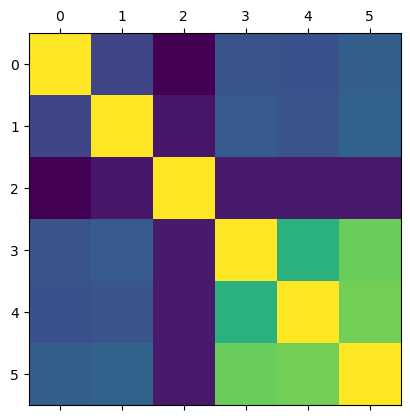

In [19]:
plt.matshow(claims_correlation)
plt.show()